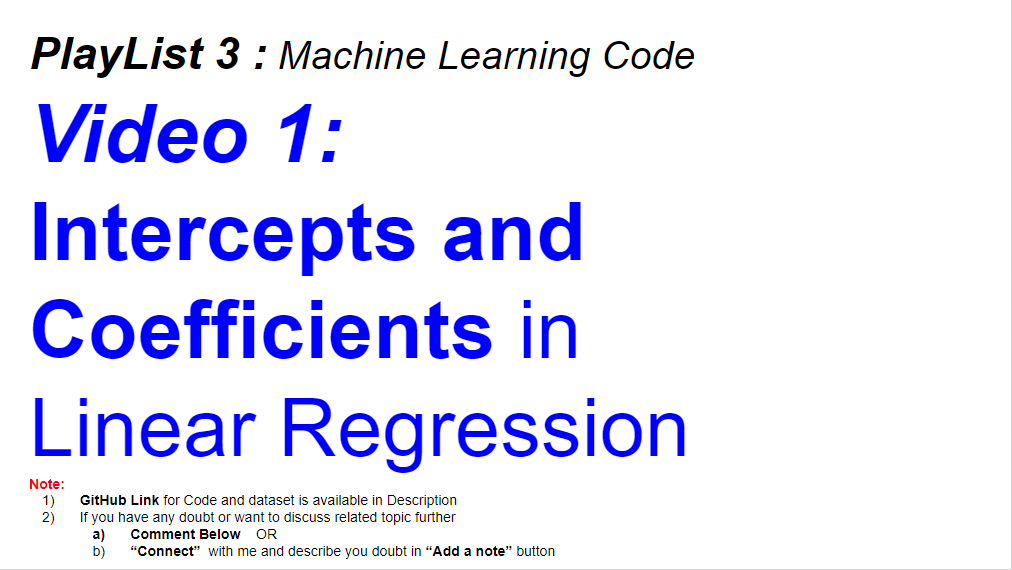

In [1]:
# Importing Lbraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
#  to sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is displayed inline within frontends
# like the Jupyter notebook, directly below the code cell that produced it.

In [2]:
data = pd.read_csv('Advertising.csv')
data
# I/p parameters or "InDependent" features : advertising in "TV" , "Radio" , "Newspaper"
# O/p parameter or "Dependent" feature : "Sales"

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape # # to print the SHAPE of the dataframe

(200, 5)

In [4]:
data.info() # to print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum() # counting the number of Null values in each feature of the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

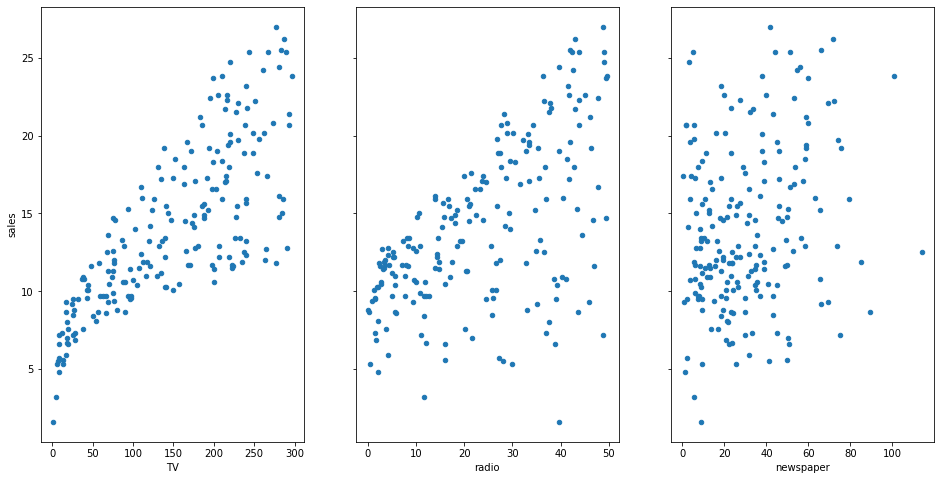

In [6]:
# To visualize the relationship between the features {i/p} and the response {o/p} using ScatterPlots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind = 'scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind = 'scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind = 'scatter', x='newspaper', y='sales', ax=axs[2])

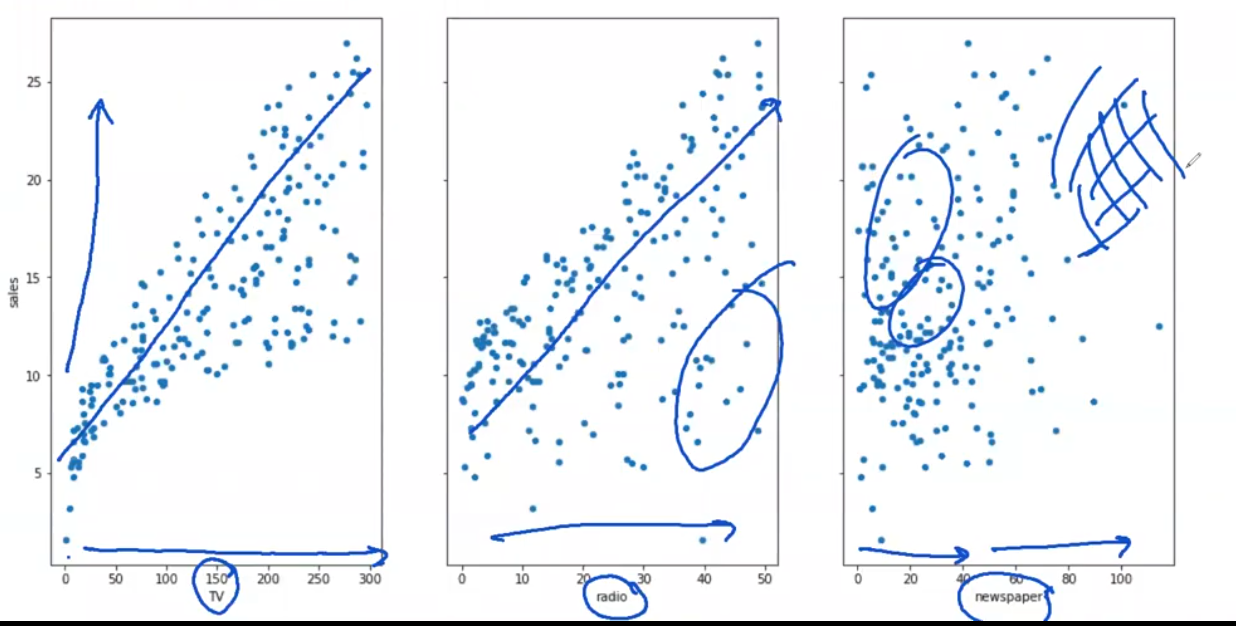

In [7]:
# Observation:
    # 1) Sales is Increasing with more "TV" advertisement
    # 2) Though, Sales is Increasing with more "Radio" advertisement
            # But Sales is not increasing propostionately further. 
            # Increasing Disbustion of Sales data
    # 3) Sales is Increasing with more "Newspaper" advertisement upto 40
            # but for [40+ units of "Newspaper" advertisement], Sales is not increasing
    # 4) 25+ units of Sales is acheived through
            # 300 units of "TV" advertisement ,
            # 50 units of "Radio" advertisement ,
            # 50 units of "Newspaper" advertisement ,

In [8]:
# to Create 
    # In-Dependent Variables (Xi) and 
    # Dependent Variables (y)
    
feature_cols = ['TV', 'radio','newspaper']
X = data[feature_cols]
y = data['sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

# to print Intercept and CO-efficientS
print(lm.intercept_)
print(lm.coef_) #o/p =~ [TV coefficient, Radio coefficient,Newspaper coefficient]

# y = m1 * x1 + m2 * x3 + m3 * x3 + c
# Sales = (0.045) * TV + (0.188) * Radio + (-0.001) * Newspaper + (2.938)
# Radio_Advertising has maximum and 'Newspaper_Advertising' has minimum/negative
        # impact on Sales

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
# Statistical Models
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
# Ordinary Least Squares regression (OLS)
lm.conf_int() #Co-efficient (m) variables

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        18:11:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

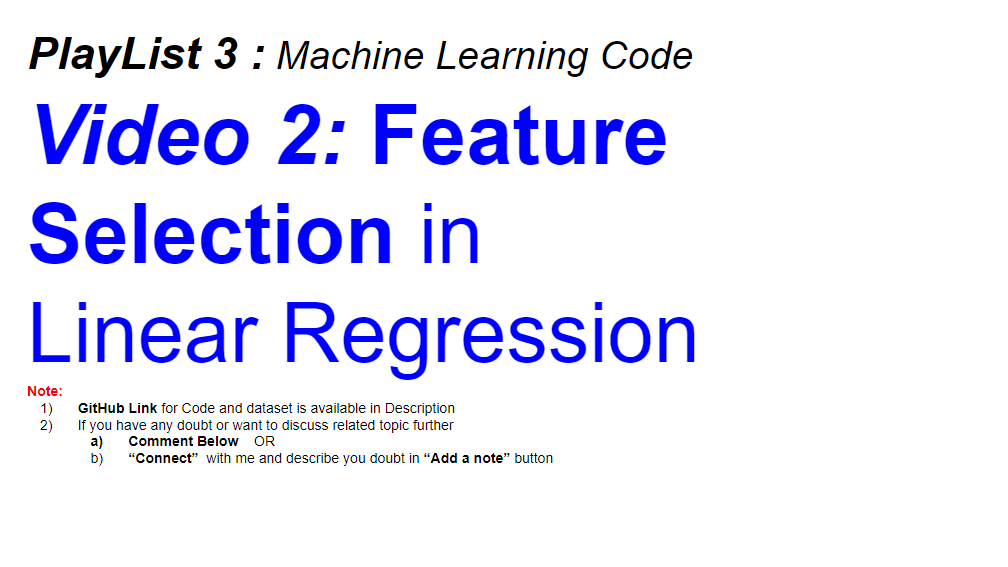

# Feature Selection

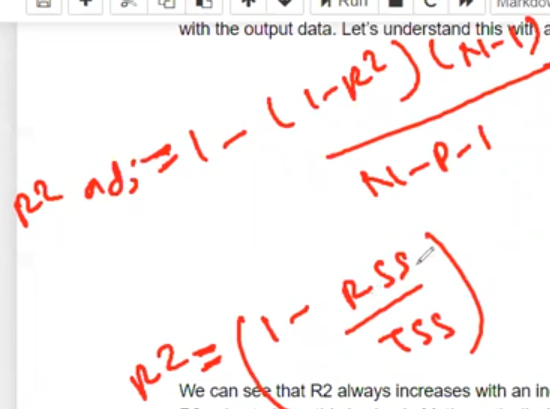

In [11]:
lm_TvRdNp = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
print("lm_TvRdNp.rsquared =   ",lm_TvRdNp.rsquared)
print("lm_TvRdNp.rsquared_adj =   ",lm_TvRdNp.rsquared_adj)

lm_TvRd = smf.ols(formula = 'sales ~ TV + radio', data=data).fit()
print("\nlm_TvRd.rsquared =   ",lm_TvRd.rsquared) # '\n' breaks the line, acts as 'ENTER' button
print("lm_TvRd.rsquared_adj =   ",lm_TvRd.rsquared_adj)

lm_TvNp = smf.ols(formula = 'sales ~ TV + newspaper', data=data).fit()
print("\nlm_TvNp.rsquared =   ",lm_TvNp.rsquared)
print("lm_TvNp.rsquared_adj =   ",lm_TvNp.rsquared_adj)

lm_RdNp = smf.ols(formula = 'sales ~ radio + newspaper', data=data).fit()
print("\nlm_RdNp.rsquared =   ",lm_RdNp.rsquared)
print("lm_RdNp.rsquared_adj =   ",lm_RdNp.rsquared_adj)

lm_Tv = smf.ols(formula = 'sales ~ TV', data=data).fit()
print("\nlm_Tv.rsquared =   ",lm_Tv.rsquared)
print("lm_Tv.rsquared_adj =   ",lm_Tv.rsquared_adj)

lm_Rd = smf.ols(formula = 'sales ~ radio', data=data).fit()
print("\nlm_Rd.rsquared =   ",lm_Rd.rsquared)
print("lm_Rd.rsquared_adj =   ",lm_Rd.rsquared_adj)

lm_Np = smf.ols(formula = 'sales ~ newspaper', data=data).fit()
print("\nlm_Np.rsquared =   ",lm_Np.rsquared)
print("lm_Np.rsquared_adj =   ",lm_Np.rsquared_adj)

# similar results as above (~ 0.89) shows the negigible / negative impact of 'Newspaper'

# R-squared is not a Correct approach, 
        # as its values increases whenever a new feature, even if irrelevent , is added
# Adjusted R-Square penalizes the model complexity to control over-fitting
        # but it under-penalizes complexity
# So better solution is "Cross- Validation"

lm_TvRdNp.rsquared =    0.8972106381789522
lm_TvRdNp.rsquared_adj =    0.8956373316204668

lm_TvRd.rsquared =    0.8971942610828957
lm_TvRd.rsquared_adj =    0.8961505479974429

lm_TvNp.rsquared =    0.6458354938293271
lm_TvNp.rsquared_adj =    0.6422399150864777

lm_RdNp.rsquared =    0.33270518395032256
lm_RdNp.rsquared_adj =    0.3259306172899197

lm_Tv.rsquared =    0.611875050850071
lm_Tv.rsquared_adj =    0.6099148238341623

lm_Rd.rsquared =    0.33203245544529525
lm_Rd.rsquared_adj =    0.32865888198794835

lm_Np.rsquared =    0.05212044544430516
lm_Np.rsquared_adj =    0.04733317496675127


In [12]:
# N = Number of Sample Size
# P = Number of predictors

# Cross - Validation
        # it provides a more reliable way to choose which of the created models will best generalize
                # as it better estimates of out-of-sample error

In [13]:
max(lm_TvRdNp.rsquared_adj,
   lm_TvRd.rsquared_adj,
    lm_TvNp.rsquared_adj,
    lm_RdNp.rsquared_adj,
    lm_Tv.rsquared_adj,
    lm_Rd.rsquared_adj,
    lm_Np.rsquared_adj)

0.8961505479974429

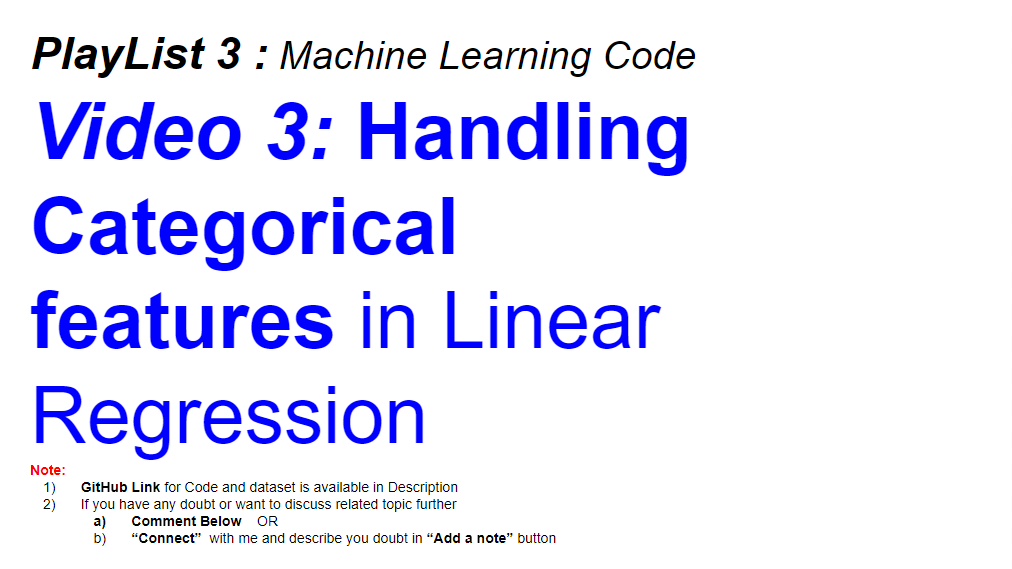

# Handling Categorical features with Two Categories
    # ML models cant understand categorical data
            # Because, they are just Mathematical equations
            # which need Numbers as i/p
            # & give o/p as Numbers only

### Any type of Model can NOT be trained with un-converted Categorical Data

In [14]:
data
# no Categorical Values in the orginial Data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
import numpy as np

# set a seed for reproductibility
np.random.seed(12345)

# create a series of booleans in which roughly half are true
nums = np.random.rand(len(data)) # random assignment
mask_large = nums > 0.5

# intially set Size to small, then change roughly half to Large
data['Scale'] = 'small'
data.loc[mask_large,'Scale'] = 'large'
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small
196,197,94.2,4.9,8.1,9.7,small
197,198,177.0,9.3,6.4,12.8,small
198,199,283.6,42.0,66.2,25.5,small


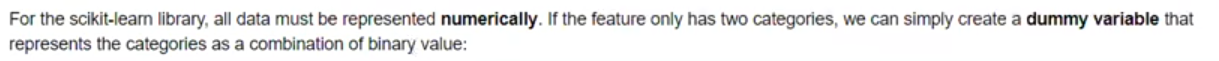

In [16]:
# create a new series called "CTGLtoNML" # Categorical to Numerical
data['CTGLtoNML'] = data.Scale.map({'small':0, 'large':1}) # MAPping function
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0
196,197,94.2,4.9,8.1,9.7,small,0
197,198,177.0,9.3,6.4,12.8,small,0
198,199,283.6,42.0,66.2,25.5,small,0


In [17]:
# other methods to convert Categorical Data into Numerical Data
    # 1) One Hot Encoding
    # 2) TF IDF approach: Text Vectorization: Term Frequency — Inverse Document Frequency (TFIDF)
    # 3) Text Data Vectorization approach
    # 4) Numeration Approach

In [18]:
# To redo the Multiple Linear regression problems and
        # include 'CTGLtoNML' Predictor
    
# create X and Y
feature_cols = ['TV', 'radio', 'newspaper', 'CTGLtoNML']
X = data[feature_cols]
y = data.sales

In [19]:
# instantiate then fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [20]:
# print Co-efficients
i = 0
for col in feature_cols:
    print('The Coefficient of ', col, 'is: ',lm.coef_[i]) # [Coefficient = m1, m2, m3, m4] for x1, x2, x3, x4
    i = i+1

The Coefficient of  TV is:  0.045719820924362775
The Coefficient of  radio is:  0.1887281431342787
The Coefficient of  newspaper is:  -0.0010976794483516079
The Coefficient of  CTGLtoNML is:  0.0574238508548277


In [21]:
# How do we interpret the coefficient for "CTGLtoNML" 
	# for a given TV / Radio / Newspaper advertisement expenditure, 
	# if the average sales increases by 57.42 weights,
	# it is considered as a Large Market

# What if the 0/1 encoding is reversed?
	# Still, the value of the coefficient will be the same.
	# The only difference will be the sign.
	# It will be a Negative number instead of Positive

# Handling Categorical features with more than Two Categories
    # Let's create a new Column called "Target Geography"
    # and randomly assign observations to be "rural" , "suburban", or "urban"

In [22]:
# set a seed for reproductibility
np.random.seed(123456)

# assign roughly one third of obersvations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Target Geography'] = 'rural'
data.loc[mask_suburban, 'Target Geography'] = 'suburban'
data.loc[mask_urban, 'Target Geography'] = 'urban'
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML,Target Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban
...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban
196,197,94.2,4.9,8.1,9.7,small,0,urban
197,198,177.0,9.3,6.4,12.8,small,0,suburban
198,199,283.6,42.0,66.2,25.5,small,0,rural


In [23]:
# Again, we need to represent 'Target Geography' numericaally.
    # But, mapping 
                # urban = 0,
                # suburban = 1,
                # rural = 2
        # will mean that 'rural' is two times 'suburban',
                                # But, thats not true
    #Hence, we will create another dummy variable through 'One Hot Encoding'

In [24]:
# to create three dummy variables using "get_dummies" function,
    
area_dummies = pd.get_dummies(data['Target Geography'],
                              prefix='Target Geography')

area_dummies

,Target Geography_rural,Target Geography_suburban,Target Geography_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,0,1
197,0,1,0
198,1,0,0


In [25]:
# to create three dummy variables using get_dummies,
            # then exclue the first dummy column
    
area_dummies = pd.get_dummies(data['Target Geography'], prefix='Target Geography').iloc[:,1:]

area_dummies

# but, 'One Hot Encoding' may create (1000-1 =) 999 columns for 1000 categories
    # "vectorization" approach solves this issue

,Target Geography_suburban,Target Geography_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,0


In [26]:
# then concatenate the dummy variable columns onto the original Dataframe 
        #(axis=0 means rows, axis =1 means columns)
data1 = pd.concat([data, area_dummies], axis=1)
data1

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML,Target Geography,Target Geography_suburban,Target Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban,1,0
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,1,0
198,199,283.6,42.0,66.2,25.5,small,0,rural,0,0


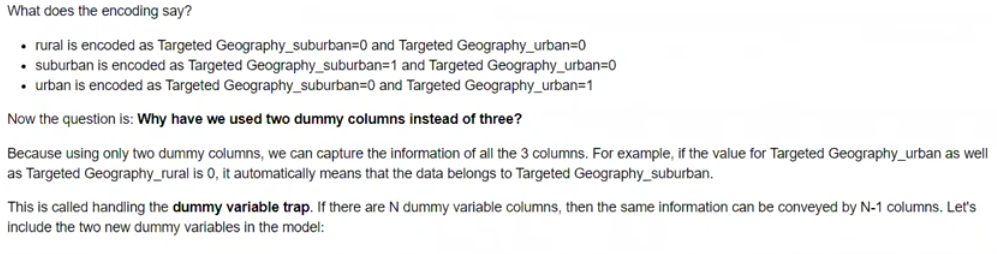

In [27]:
# create X and Y
feature_cols = ['TV', 'radio', 'newspaper', 'CTGLtoNML', 'Target Geography_suburban', 'Target Geography_urban']
X = data1[feature_cols]
y = data1.sales
print(X)
print(y)

        TV  radio  newspaper  CTGLtoNML  Target Geography_suburban  \
0    230.1   37.8       69.2          1                          0   
1     44.5   39.3       45.1          0                          0   
2     17.2   45.9       69.3          0                          0   
3    151.5   41.3       58.5          0                          0   
4    180.8   10.8       58.4          1                          1   
..     ...    ...        ...        ...                        ...   
195   38.2    3.7       13.8          0                          1   
196   94.2    4.9        8.1          0                          0   
197  177.0    9.3        6.4          0                          1   
198  283.6   42.0       66.2          0                          0   
199  232.1    8.6        8.7          1                          0   

     Target Geography_urban  
0                         0  
1                         1  
2                         0  
3                         1  
4        

In [28]:
# instantiate then fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [29]:
# print Co-efficients
print(feature_cols,lm.coef_)

['TV', 'radio', 'newspaper', 'CTGLtoNML', 'Target Geography_suburban', 'Target Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [30]:
# 'Target Geography_suburban' = -0.10656299  # Advertisments have (-ve) effect in Sub-Urban area
# 'Target Geography_urban' = 0.26813802  # Advertisments have (+ve) effect in Sub-Urban area

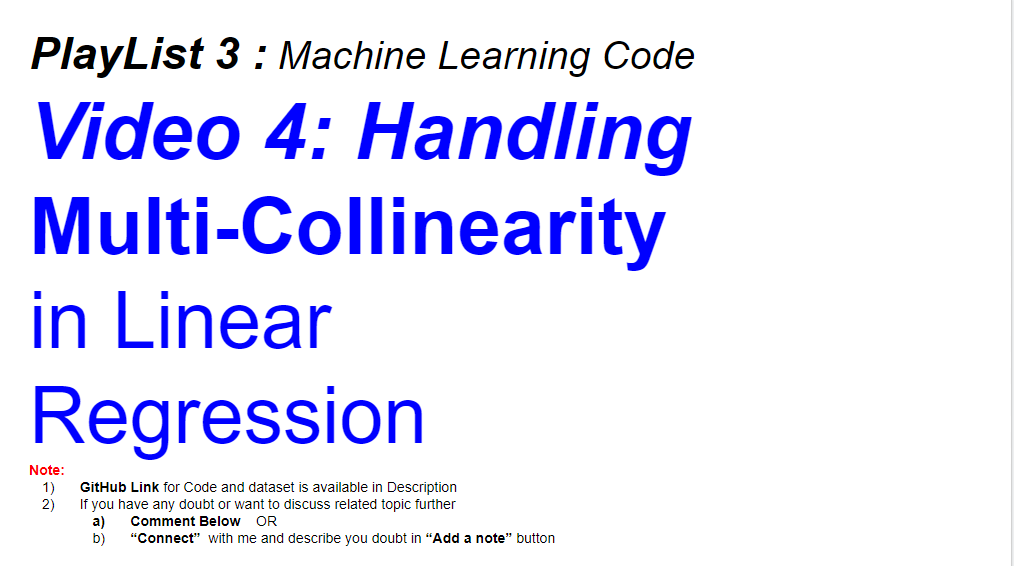

# Handling Multi-Collinearity

 #### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* **Principal Component Analysis**

In [31]:
# importing necessary Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (Ridge, Lasso, ElasticNet,
                                RidgeCV, LassoCV, ElasticNetCV,
                                LinearRegression)
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

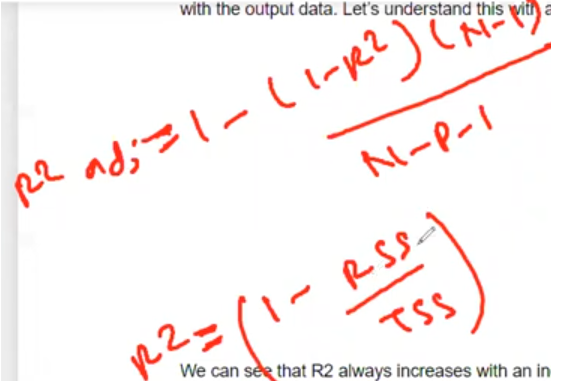

In [32]:
# creating a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [33]:
# Weblink to dwoanload Data from Kaggle
    # https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv
df = pd.read_csv('Admission_Predict_Ver1.1.csv') # to predict the "Chance of Admit"
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [34]:
df.describe(include='all') # stats of each feature

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [35]:
# COunting all Null / Nan values
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [36]:
# observation -- there are no Null values, hence No need to replace the same.
# But if They were present, then we would have replaced
                    # the categorical data with mode and
                    # the numerical data with Median / mean
        
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].median)
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].median)

In [37]:
# Lets drop the feature "Serial No",
                # as it does not contribute in prediction
df = df.drop(columns = ['Serial No.'])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

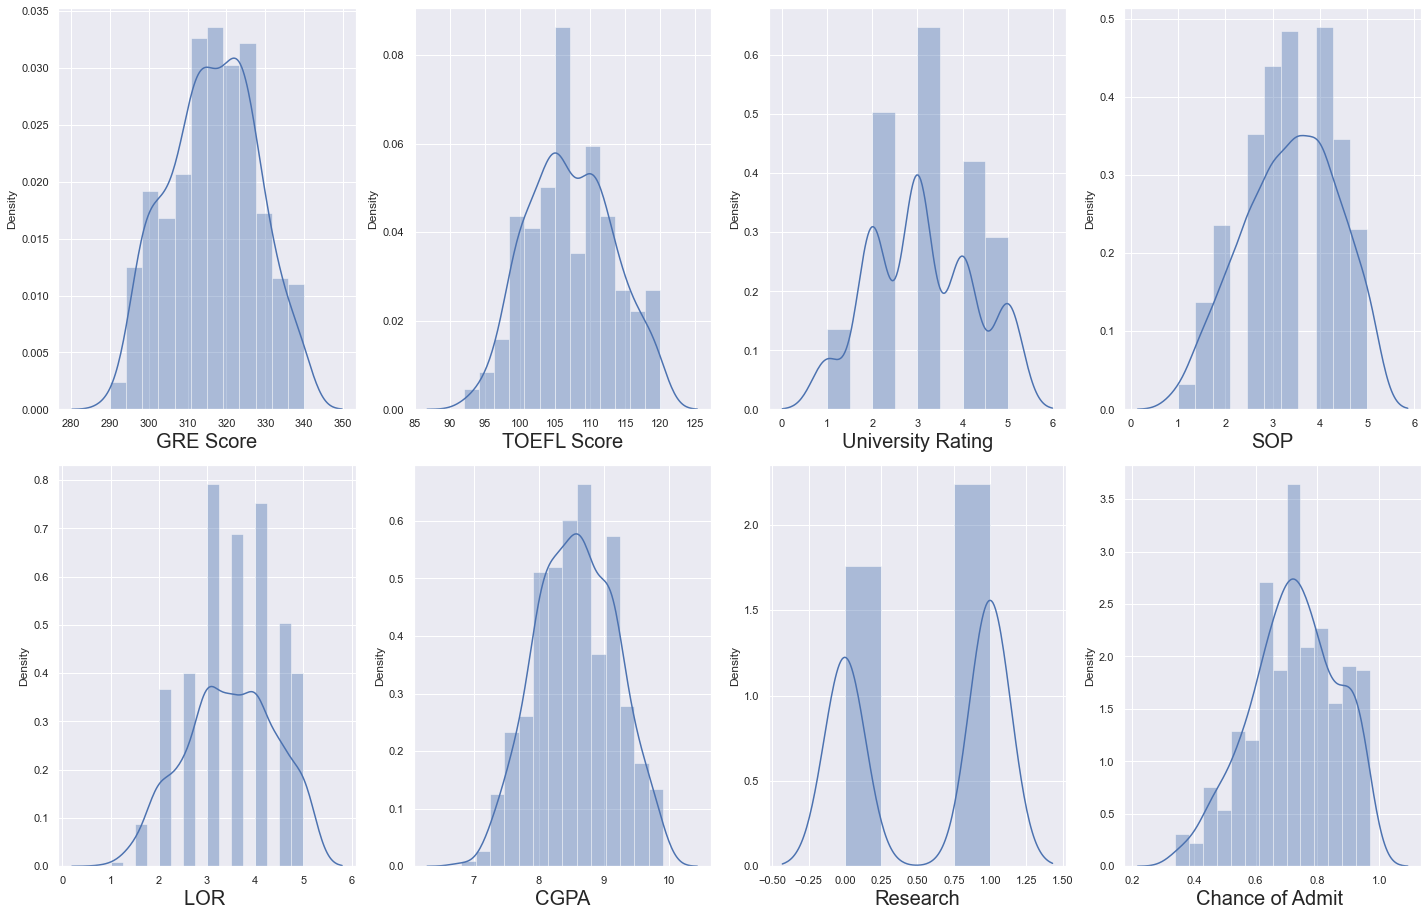

In [38]:
# Let's visualize the data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [39]:
# Observation:
    #The data distribution looks decent enough and there doesn't seem to be any skewness


In [40]:
# Let's analyze the relationship between independent and dependent variables
y = df['Chance of Admit '] # dependent variable
X =df.drop(columns = ['Chance of Admit ']) # independent variables

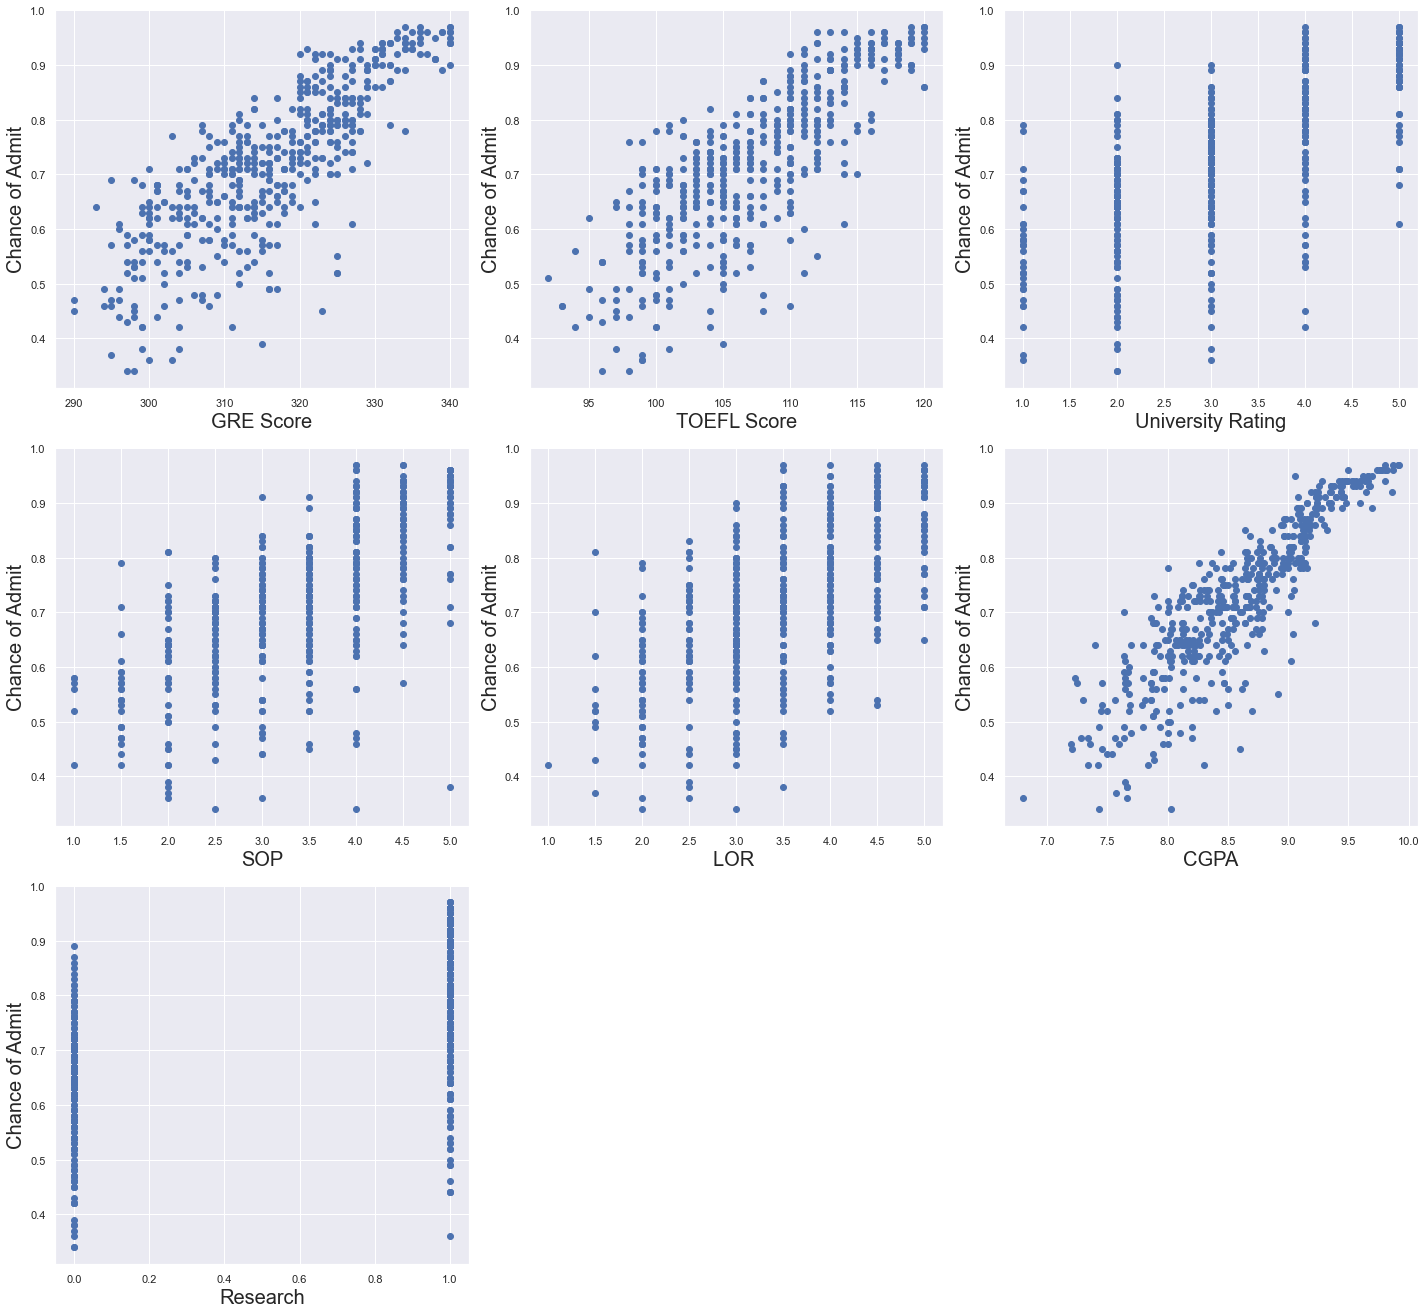

In [41]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y) # # plotting Single / combined graph
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1 # plotting individual graphs
plt.tight_layout()

# observation:
    # 1) Numerical Data: GRE Score,TOEFL Score, CGPA, Research
    # 2) Categorical Data: University Rating, SOP, LOR, Research
    # 3) All features have +ve co-relation wtih the feature 'Chance of Admit'
    # 4) the relationship between the dependent and independent variables look fairly linear.
            #Thus, our linearity assumption is satisfied.

# to check for multicollinearity

In [42]:
# to check for multicollinearity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif['Features'] = X.columns

vif

,VIF,Features
0,4.464249,GRE Score
1,3.904213,TOEFL Score
2,2.621036,University Rating
3,2.835210,SOP
4,2.033555,LOR
5,4.777992,CGPA
6,1.494008,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=355)
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit , Length: 375, dtype: float64

In [45]:
# fitting LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [46]:
regression.predict(scaler.transform([[300,110,5,5,5,10,1]]))

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.91275546])

In [47]:
# saving the model to the local file system

import pickle # to create a physical file,
                    # which holds the linear equation (y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 )
filename = 'finalized_Admission_Predict.pickle'
pickle.dump(regression, open(filename,'wb'))

In [48]:
# prediction using the saved model
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a # o/p ~ preidction of 'Chance of Admit '

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.91275546])

In [49]:
regression.score(x_train,y_train) #r-squared

0.8435630641517411

In [50]:
adj_r2(x_train,y_train)

0.840579253386243

In [51]:
# Observation: Our r2 score is 84.35% and adj r2 is 84.05% for our training set., 
        # so looks like we are not being penalized by use of any feature.

In [52]:
# Let's check how well model fits the test data.

# Now let's check if our model is overfitting our data using regularization.

In [53]:
regression.score(x_test,y_test)

0.751656994177958

In [54]:
adj_r2(x_test,y_test)

0.7367988656245024

In [55]:
# observation: our model r2 score  is less on the test data (73, 75%)
            # than that on train data (~ 84%)

In [56]:
# Let's see if our model is overfitting our training data.

# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv = LassoCV(alphas= None, cv = 10, max_iter= 100000, normalize=True) # "max_iter" ~ number of iterations
lasscv.fit(x_train,y_train)

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [57]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

3.488553060004138e-05

In [58]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.488553060004138e-05)

In [59]:
lasso_reg.score(x_test,y_test)

# our r2_score for test data (~75%) comes same as before using regularization. 
# So, it is fair to say our OLS model did not overfit the data.

0.751626775362118

In [60]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
# "low=0, high=10" ~ means o/p values will fluctuate between 0 to 10
alphas

array([9.94459771, 1.62428756, 7.6759965 , 2.58656878, 7.30059804,
       9.31713904, 3.34468953, 3.04279727, 5.83060913, 8.51409982,
       8.55828205, 2.34785733, 3.42601254, 5.345584  , 3.09891827,
       7.24270115, 7.43945161, 7.75281969, 8.17264335, 1.79507952,
       7.42200447, 5.44548756, 9.15021052, 5.42831327, 1.3401617 ,
       8.03550378, 1.81992803, 2.40258739, 2.72573801, 1.67762741,
       4.20216123, 1.94360966, 9.73206067, 2.8375437 , 4.91383365,
       5.70675243, 2.9190174 , 3.50583572, 4.31752137, 2.94151878,
       4.32109577, 3.51759102, 3.40961861, 9.77373525, 2.42211428,
       1.17213713, 7.28339677, 3.93244036, 2.20176584, 0.84324466])

In [61]:
# CV ~ Cross validation
ridgecv = RidgeCV(alphas=alphas,cv=10,normalize=True) # "cv=10" ~ 10 folds validation
ridgecv.fit(x_train,y_train)

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kapil Wanaskar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beh

RidgeCV(alphas=array([9.94459771, 1.62428756, 7.6759965 , 2.58656878, 7.30059804,
       9.31713904, 3.34468953, 3.04279727, 5.83060913, 8.51409982,
       8.55828205, 2.34785733, 3.42601254, 5.345584  , 3.09891827,
       7.24270115, 7.43945161, 7.75281969, 8.17264335, 1.79507952,
       7.42200447, 5.44548756, 9.15021052, 5.42831327, 1.3401617 ,
       8.03550378, 1.81992803, 2.40258739, 2.72573801, 1.67762741,
       4.20216123, 1.94360966, 9.73206067, 2.8375437 , 4.91383365,
       5.70675243, 2.9190174 , 3.50583572, 4.31752137, 2.94151878,
       4.32109577, 3.51759102, 3.40961861, 9.77373525, 2.42211428,
       1.17213713, 7.28339677, 3.93244036, 2.20176584, 0.84324466]),
        cv=10, normalize=True)

In [62]:
ridgecv.alpha_

0.8432446610176114

In [63]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.8432446610176114)

In [64]:
ridge_model.score(x_test,y_test)

0.7520477557368344

In [65]:
# we got the same r2 square using Ridge regression as well. 
        # So, it's safe to say there is no overfitting.

# Elastic Net

In [66]:
elasticCV = ElasticNetCV(alphas = None, cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [67]:
# finding besst possible Alpha value
elasticCV.alpha_

0.001272749772175385

In [68]:
# l1_ratio gives how close the model is to L1 regularization, 
    #below value indicates we are giving equal 
        #preference to L1 and L2

elasticCV.l1_ratio

0.5

In [69]:
# pass / fit the data on "elasticCV"
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=0.001272749772175385)

In [70]:
elasticnet_reg.score(x_test,y_test)

0.7512310922466789

In [71]:
# Observation:
# So, we can see by using different type of regularization, we still are getting the same r2 score. 
# That means our OLS model has been well trained over the training data and there is no overfitting.

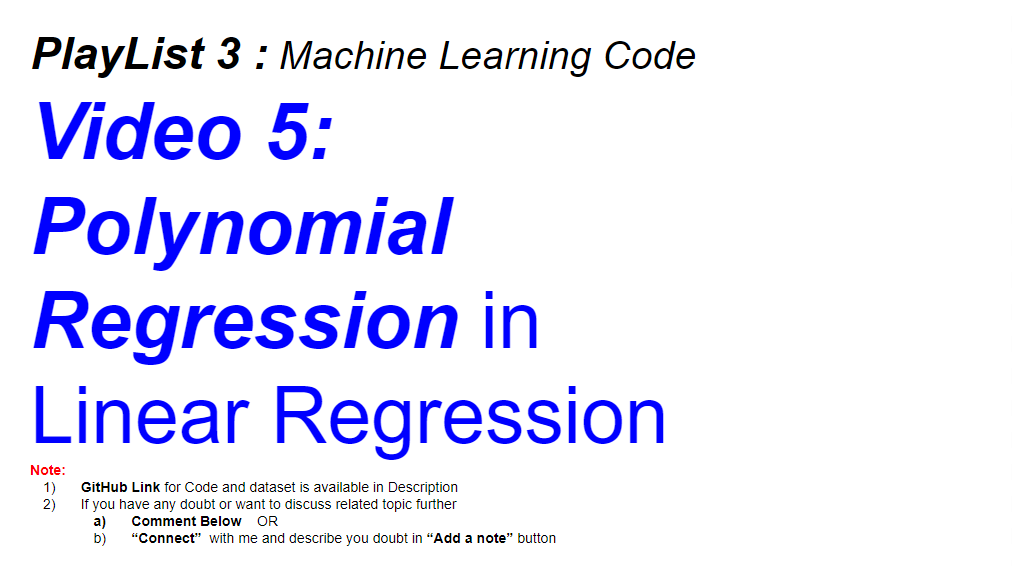

# Polynomial Regression

In [72]:
#y = m1 * x^1 + m2 * x^2 + m3 * x^4 + .... + mn * x^n + c
    #Higher degree Polynomial

In [73]:
# importing necessary file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# to make sure that the Graphs are printed in the Jupyter Notebook itself

In [74]:
# importing the dataset
# Weblink to download
        # https://www.kaggle.com/akram24/position-salaries?select=Position_Salaries.csv
df = pd.read_csv('Position_Salaries.csv')# the full namespace of the file can be provided 
                                        # if the file is not in the same directory as the .ipynb or.py file
df   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the
Position and Level of the employee.
But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.
Hence, Level is our feature or X variable.
And, Salary is Label or the Y variable

In [75]:
x = df.iloc[:,1].values
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [76]:
x = df.iloc[:,1:2].values
# "[:, " ~ selecting all the rows
# "1:2] " ~ selecting all the columns from 1 to 2

#x=df.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=df.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [77]:
y = df.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

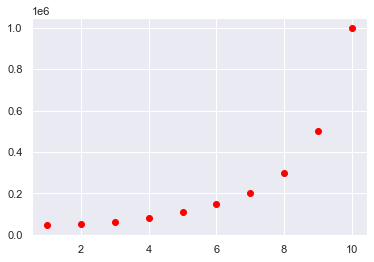

In [78]:
# Visualising the Linear Regression results
plt.scatter(x,y,color = 'red') # plotting the data as Red points

In [79]:
# fitting Linear Regression to the Dataset
from sklearn.linear_model import LinearRegression
lin_reg =  LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

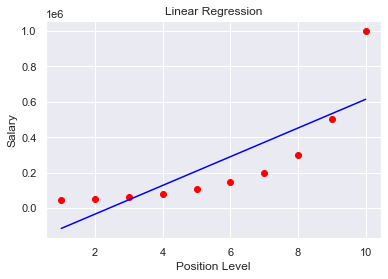

In [80]:
# Visualising the Linear Regression results
plt.scatter(x,y,color = 'red') # plotting the SCATTered data as Red points
plt.plot(x, lin_reg.predict(x), color='blue') # plotting the "blue" colored Prediction STRAIGHT line
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Obervation:
        # The straight line's prediction is very poor

Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [81]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [82]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
# "(degree=2)" trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [83]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [84]:
# doing the actual Polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression.

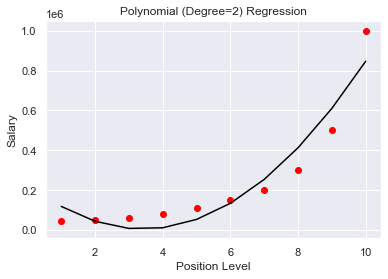

In [85]:
# Visualising the POLYNOMIAL Regression results
plt.scatter(x,y,color = 'red') # plotting the SCATTered data as Red points
plt.plot(x, lin_reg_2.predict(X_poly), color='black') 
# plotting the "black" colored Prediction CURVE
plt.title('Polynomial (Degree=2) Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

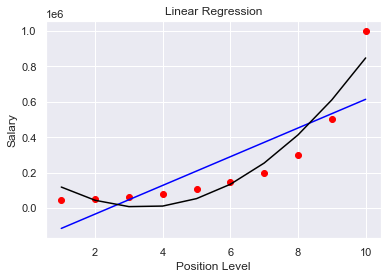

In [86]:
# Visualising the POLYNOMIAL Regression results
plt.scatter(x,y,color = 'red') # plotting the SCATTered data as Red points
plt.plot(x, lin_reg.predict(x), color='blue') # plotting the "blue" colored Prediction STRAIGHT line
plt.plot(x, lin_reg_2.predict(X_poly), color='black') 
# plotting the "black" colored Prediction CURVE
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Trying (degree=4) polynomial regression

In [87]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
# "(degree=4)" trying to create a 4 degree polynomial equation. It simply squares the x as shown in the output
X_poly4 = poly_reg.fit_transform(x)
print(X_poly4)
poly_reg.fit(X_poly4, y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


PolynomialFeatures(degree=4)

In [88]:
poly_reg

PolynomialFeatures(degree=4)

In [89]:
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4,y)

LinearRegression()

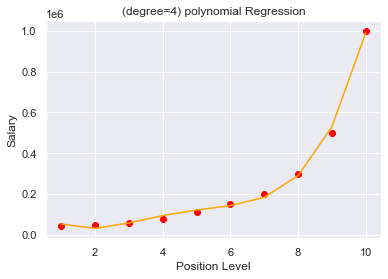

In [90]:
# Visualising the POLYNOMIAL Regression results
plt.scatter(x,y,color = 'red') # plotting the SCATTered data as Red points
plt.plot(x, lin_reg_4.predict(X_poly4), color='orange') 
# plotting the "black" colored Prediction CURVE
plt.title('(degree=4) polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

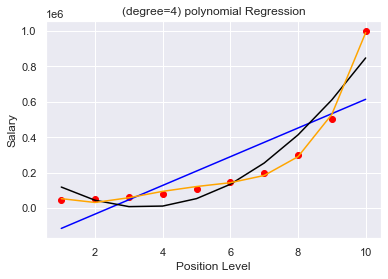

In [91]:
# Visualising the POLYNOMIAL Regression results
plt.scatter(x,y,color = 'red') # plotting the SCATTered data as Red points
plt.plot(x, lin_reg.predict(x), color='blue') # plotting the "blue" colored Prediction STRAIGHT line
plt.plot(x, lin_reg_2.predict(X_poly), color='black') # plotting the "black" colored Prediction CURVE
plt.plot(x, lin_reg_4.predict(X_poly4), color='orange')
plt.title('(degree=4) polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Observation:
Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets. we are getting a brilliant fit as the number of datapoints are a few.